Text(0, 0.5, 'Paramètre 1')

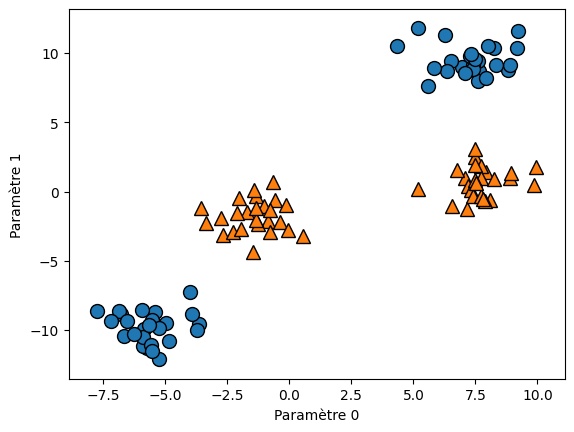

In [2]:
%matplotlib inline 
# On ajout des caractéristiques supplémentaires pour surdimensionner le modèle de sorte que
# les modèles connus puissent intégrer les solutions.
# ( on transforme l'espace des solutions pour y déceler un sous-ensemble )

import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
import mglearn

X,y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")
# Deux classes, impossibilité de trouver une frontière linéaire dans un espace à deux dimensions

Text(0.5, 0, 'Carré du paramètre 1')

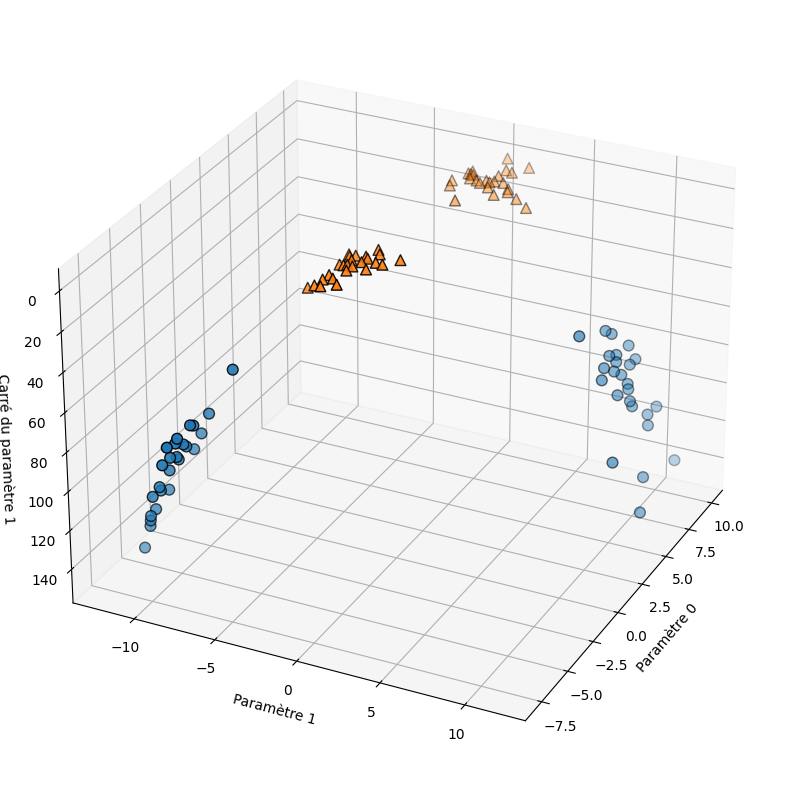

In [27]:
# En ajoutant le carré du second paramètre ( on rend la formule de prédiction quadratique ) ce qui transforme 
# la ligne du modèle linéaire en conique dans un espace de dimension 2

import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X,X[:,1:]**2])
figure = plt.figure(figsize=(20,10))
# Avant la version 1.0
# ax = Axes3D(figure, elev=-152, azim=-26,roll=30)
# Après la versin 1.0
ax = figure.add_subplot(111,projection='3d')
ax.view_init(elev=-152, azim=-26)
mask = y == 0

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2],  s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2],
          marker='^', s=60, edgecolor='k')
ax.set_xlabel("Paramètre 0")
ax.set_ylabel("Paramètre 1")
ax.set_zlabel("Carré du paramètre 1")

Text(0.5, 0, 'Carré du paramètre 1')

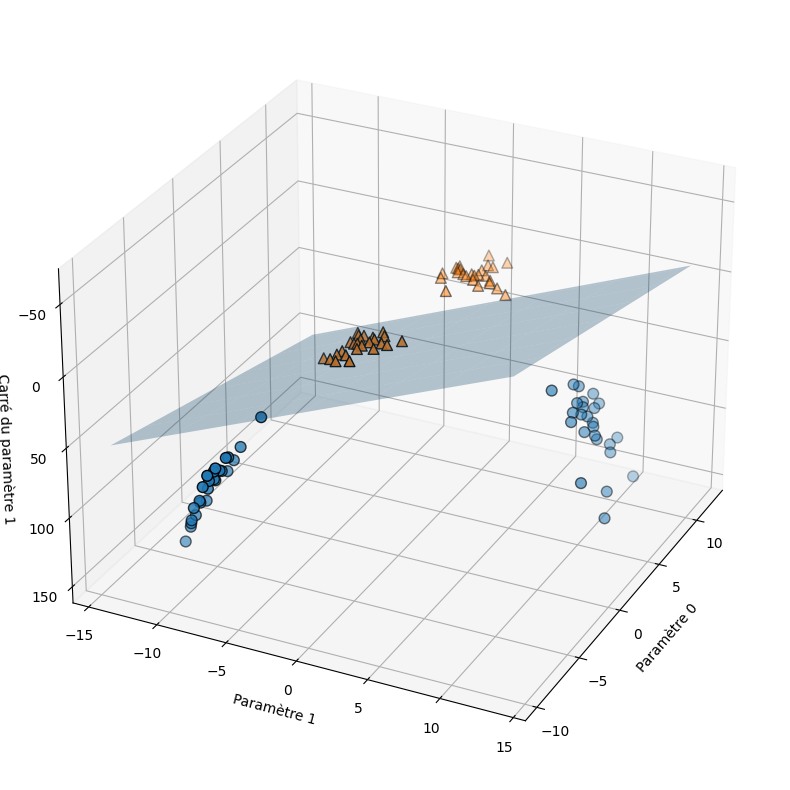

In [57]:
from sklearn.svm import LinearSVC

linear_svm_3d = LinearSVC(loss='hinge',max_iter=5000).fit(X_new,y)
coef, biais = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_.ravel()

figure = plt.figure(figsize=(20,10))

ax = figure.add_subplot(111,projection='3d')
ax.view_init(elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX,YY = np.meshgrid(xx,yy)

# Dessin de la frontière pour 
#     coef0*XX + coef1*YY + coef2*ZZ = ^y^ avec ^y^ = 0 
# <=> coef0*XX + coef1*YY = -coef2*ZZ
# <=> (coef0*XX + coef1*YY)/-coef2 = ZZ
ZZ = (coef[0] * XX + coef[1] * YY + biais ) / -coef[2]

mask = y == 0
ax.plot_surface(XX,YY,ZZ, rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2],  s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2],
          marker='^', s=60, edgecolor='k')
ax.set_xlabel("Paramètre 0")
ax.set_ylabel("Paramètre 1")
ax.set_zlabel("Carré du paramètre 1")

Text(0, 0.5, 'Paramètre 1')

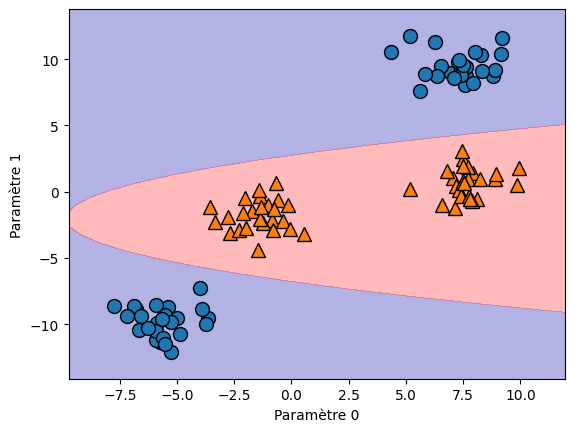

In [58]:
# En deux dimensions la conique suivante : 
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")

Text(0, 0.5, 'Paramètre 1')

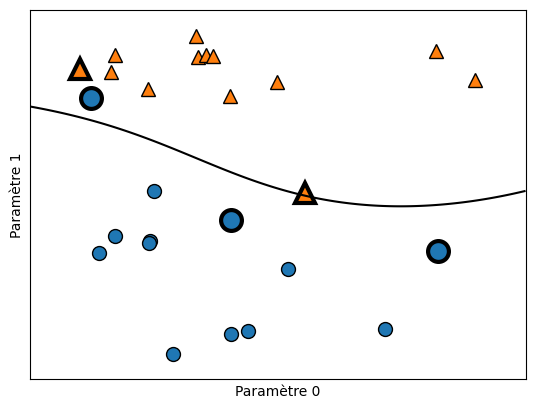

In [60]:
# Introduction du paramètre de rayon du noyau gaussien autour des vecteurs de support : 
# un sous-ensemble de point d'apprentissage pertinents au sens de leur proximité avec la frontière 
# de décision

from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels,s=15, markeredgewidth=3)
plt.xlabel("Paramètre 0")
plt.ylabel("Paramètre 1")

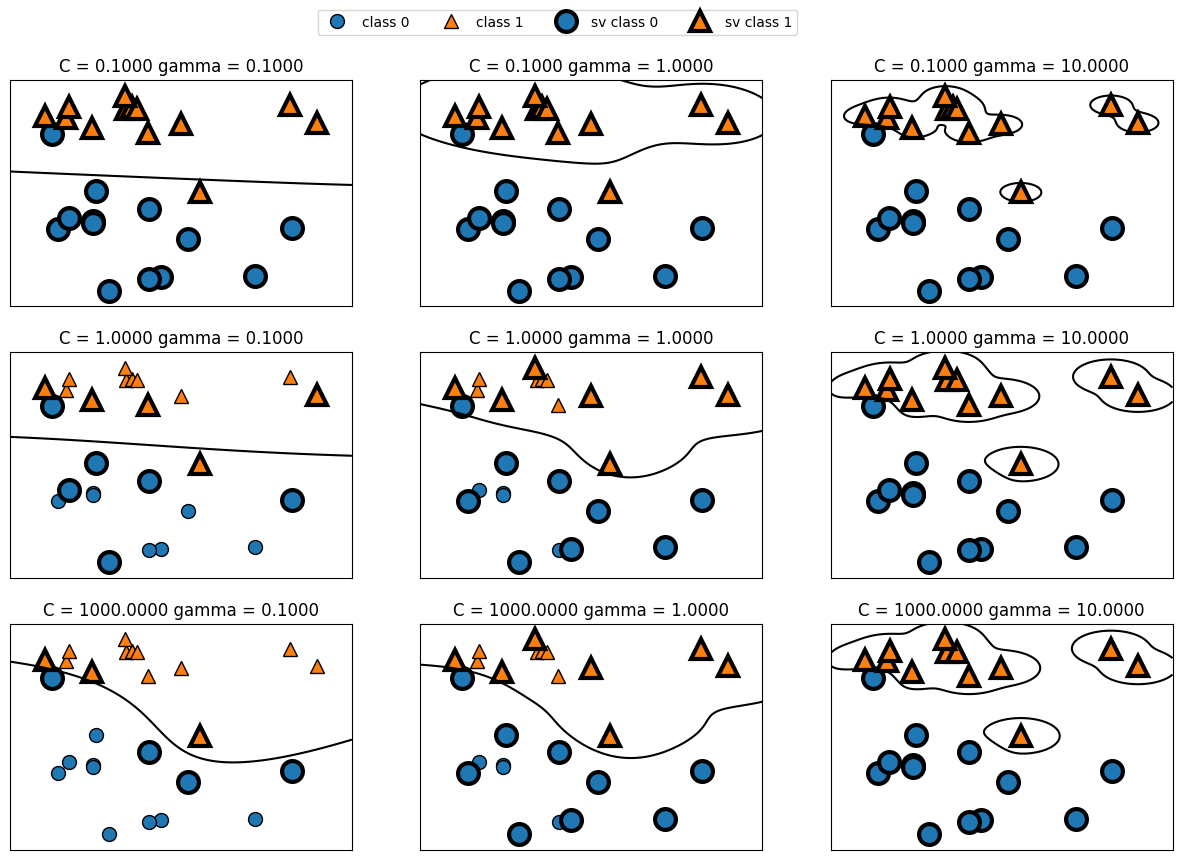

In [62]:
# Observations quant à la variabilité des paramètres
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"], ncol=4, loc=(.9, 1.2))

# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

Précision sur le jeu d'entraînement : 0.904
Précision sur le jeu de test : 0.937


Text(0, 0.5, 'Amplitude des paramètres')

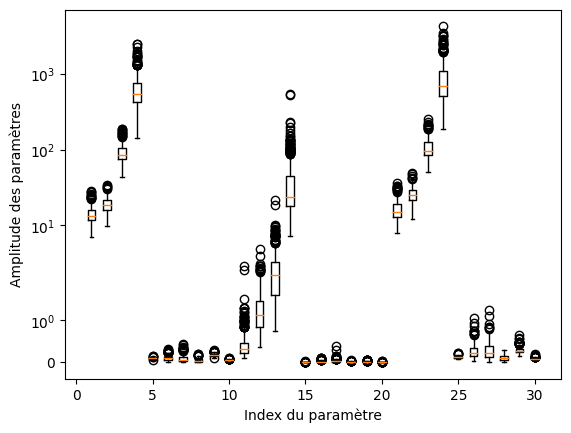

In [67]:
# Les svm pour être efficaces doivent avoir des caractéristiques qui évoluent de manière similaire

# En appliquant un svm sur le jeu de données breast_cancer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
bc = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(bc.data, bc.target, random_state=0)
svc=SVC()
svc.fit(X_train,y_train)

print("Précision sur le jeu d'entraînement : {:.3f}".format(svc.score(X_train, y_train)))
print("Précision sur le jeu de test : {:.3f}".format(svc.score(X_test, y_test)))

plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Index du paramètre")
plt.ylabel("Amplitude des paramètres")

In [84]:
# D'où l'importance du pré-traitement des données : recalibrage
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum pour chaque paramètre\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum pour chaque paramètre\n{}".format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_on_training) / range_on_training

# Entraînement du svc sur le jeu recalibré
svc = SVC()
svc.fit(X_train_scaled,y_train)

# Evaluation des performances :
print("\n\nPrécision sur le jeu d'entraînement : {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Précision sur le jeu de test : {:.3f}".format(svc.score(X_test_scaled,y_test)))

# Adaptation du paramètre de classification
svc = SVC(C=0.5)
svc.fit(X_train_scaled,y_train)
print("\n\nPrécision sur le jeu d'entraînement : {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Précision sur le jeu de test : {:.3f}".format(svc.score(X_test_scaled,y_test)))


Minimum pour chaque paramètre
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum pour chaque paramètre
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Précision sur le jeu d'entraînement : 0.984
Précision sur le jeu de test : 0.972


Précision sur le jeu d'entraînement : 0.979
Précision sur le jeu de test : 0.979
